In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

In [28]:
from project.utils.ds.dataset import BoxedExamplesDataset, transform_chain, LazyMaskedExamplesDataset
from pathlib import Path
from project.utils.ds import transforms as tr
from project.utils.ds.images import is_grayscale
import numpy as np
from torchvision.transforms import Compose
from project.utils.ds.dataset import transform_chain
import matplotlib.pyplot as plt

In [4]:
train_path = Path("../data/stage1_train/")
test_path = Path("../data/stage1_test/")

ds_train = BoxedExamplesDataset.from_path(train_path, transform = Compose([]), )

ds_test = BoxedExamplesDataset.from_path(test_path, transform = Compose([]), )

670it [00:58, 11.54it/s]
65it [00:00, 6198.38it/s]


In [5]:
ds_train[0].id

0

In [66]:
from project.utils.ds import transforms as tr
from project.utils.ds import random_transforms as rnd
from project.utils.models import tv_rcnn

transform_chain = [
    tr.to_grayscale,
    tr.flip_color_on_intensity_heuristic,
    tr.max_pixel_to_255,
#     rnd.random_transform(tr.rotate, rnd.rotate_90_sampler()),
    rnd.random_transform(tr.rotate, rnd.rotate_sampler(amplitude=10)),
#     tr.resize_to_min_300,
#     rnd.random_transform(tr.crop, rnd.constant_crop_size_sampler(crop_size=256/300)),
    tr.to_rgb,
    tv_rcnn.to_model_input
#     tr.to_tensors_tuple
]

In [67]:
ds_train.transform = Compose(transform_chain)


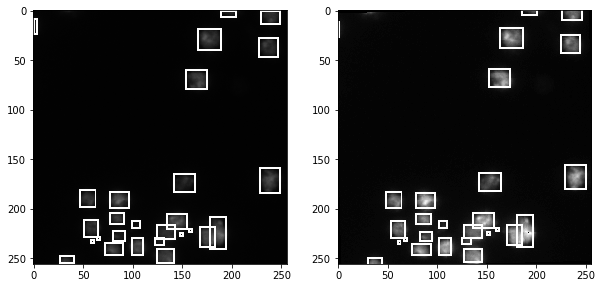

In [73]:
ex_orig = ds_train.examples[0]
ex = tv_rcnn.model_input_to_boxed_example(ds_train[0])

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(ex_orig.vis_boxes())
ax[1].imshow(ex.vis_boxes())

In [ ]:
import pickle
with Path("train_1_ids_no_transform.pkl").open("wb") as f:
    pickle.dump(ds_train, f)

with Path("test_1_ids_no_transform.pkl").open("wb") as f:
    pickle.dump(ds_test, f)

In [ ]:
with Path("train_1_no_mask_no_transform.pkl").open("rb") as f:
    ds = pickle.load(f)
ds.transform = Compose(transform_chain)

ex = ds[13]

# ex.vis_segmasks(alpha=0.5)
ex.vis_boxes(2)

In [ ]:
tr.rotate(ex, 15).vis_boxes()